# 04. 데이터 시각화 (p60~)


## 1. 멧플롯립(matplotlib)을 활용한 데이터 시각화

멧플롯립은 파이선에서 활용하는 대표적인 시각화 도구로 다양한 2차원 평면 그래프를 지원한다.

In [1]:
# 판다스, 넘파이, 멧플롯립 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 단순(선) 그래프 그리기

선 그래프는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타낸다. 특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

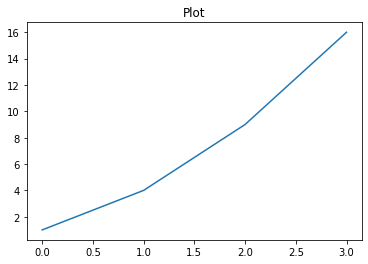

In [3]:
plt.title("Plot")
plt.plot([1, 4, 9, 16])
plt.show()

이때 x축의 자료 위치, 즉 틱(tick)은 자동으로 0, 1, 2, 3이 된다. 만약 이 x tick 위치를 별도로 명시하고 싶다면 다음과 같이 두 개의 같은 길이의 리스트 혹은 배열 자료를 넣는다.

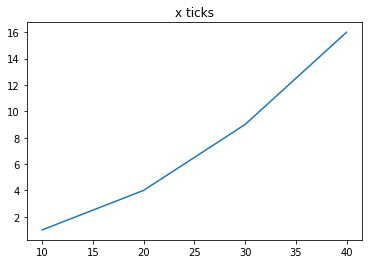

In [4]:
In [3]: plt.title("x ticks")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

### 막대 그래프 그리기

다양한 형태의 막대 그래프 표현이 가능하다.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.DataFrame({"column1":[1,3,5,7,9], "column2":[9,8,6,5,3]})
data

column1  column2
0        1        9
1        3        8
2        5        6
3        7        5
4        9        3

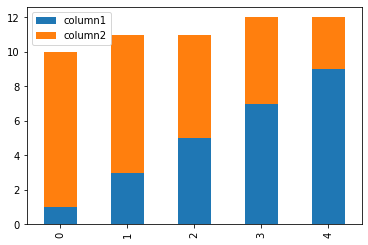

In [7]:
data.plot(kind='bar', stacked=True)

## 2. 폴리움(Folium) 라이브러리로 지도 표현

### 지도 만들기

37.5838699,127.0565831,17z 값은 정확히는 해당 위치의 좌표 값이 아니라 G4 지도 화면이 보여주고 있는 화면의 정중앙 값의 좌표와 배율이다. G4 지도에서 알아낸 값을 바탕으로 아래와 같이 지도를 초기화할 수 있고, folium.Map.save() 를 이용해서 html파일로 저장할 수 있다.

In [8]:
import folium
m = folium.Map(
    location=[37.5838699,127.0565831],
    zoom_start=15
    )
m.save('map.html')

In [9]:
import urllib.request, json
with urllib.request.urlopen('https://raw.githubusercontent.com/southkorea/seoul-maps/master/juso/2015/json/seoul_municipalities_geo.json') as url:
    data = json.loads(url.read().decode())
    
import json
json_string = json.dumps(data)

# json_string 파일로 저장하기
f = open('seoul_municipalities_geo.json','w')
f.write(json_string)
f.close()

# 파일 읽기
f = open('./seoul_municipalities_geo.json','r')
geo = json.loads(f.read())

folium.GeoJson(
    geo,
    name='seoul_municipalities'
).add_to(m)

In [10]:
import folium
m = folium.Map(
    location=[37.5838699,127.0565831],
    zoom_start=10
)

import json
with open('./seoul_municipalities_geo.json',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
    
folium.GeoJson(
    geo,
    name='seoul_municipalities'
).add_to(m)
m.save('map.html')